In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# path of data 
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [4]:
X = df[['highway-mpg']]
Y = df['price']

In [5]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

What is the value of the intercept (a)?

In [7]:
lm.intercept_

38423.305858157386

In [8]:
lm.coef_

array([-821.73337832])

What is the final estimated linear model we get?
As we saw above, we should get a final linear model with the structure:

𝑌ℎ𝑎𝑡=𝑎+𝑏𝑋
 
Plugging in the actual values we get:

price = 38423.31 - 821.73 x highway-mpg

Question #1 a): 
Create a linear regression object?

In [9]:
cm = LinearRegression()
cm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Question #1 b): 
Train the model using 'engine-size' as the independent variable and 'price' as the dependent variable?

In [10]:
X = df[['engine-size']]
Y = df['price']
cm = cm.fit(X,Y)
cm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
output = cm.predict(X)
output[0:5]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

Question #1 c):
Find the slope and intercept of the model?

In [12]:
cm.intercept_.round(2)

-7963.34

In [13]:
cm.coef_.round(2)

array([166.86])

Question #1 d): 
What is the equation of the predicted line. You can use x and yhat or 'engine-size' or 'price'?

As we saw above, we should get a final linear model with the structure:

𝑌ℎ𝑎𝑡=𝑎+𝑏𝑋
 
Plugging in the actual values we get:

price = -7963.34 + 166.86 x highway-mpg

Multiple Linear Regression

In [14]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [15]:
lm.fit(Z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
yhatm = lm.predict(Z)
yhatm[0:5]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211])

In [17]:
lm.intercept_.round(2)

-15806.62

In [18]:
lm.coef_.round(2)

array([53.5 ,  4.71, 81.53, 36.06])

What is the final estimated linear model that we get?

As we saw above, we should get a final linear function with the structure:

𝑌ℎ𝑎𝑡=𝑎+𝑏1𝑋1+𝑏2𝑋2+𝑏3𝑋3+𝑏4𝑋4
 
What is the linear function we get in this example?

Price = -15806.62 + 53.5 x horsepower + 4.71 x curb-weight + 81.53 x engine-size + 36.06 x highway-mpg

In [19]:
lm3 = lm.fit(df[['normalized-losses','highway-mpg']], df['price'])
lm3

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
yhatm = lm3.predict(df[['normalized-losses','highway-mpg']])
yhatm[0:5]

array([16231.78938339, 16231.78938339, 17052.24372355, 13833.33798916,
       20396.97271047])

In [21]:
lm3.intercept_.round(2)

38201.31

In [22]:
lm3.coef_.round(2)

array([   1.5 , -820.45])

Multiple Linear Regression

In [23]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

Regression Plot

Let's visualize Horsepower as potential predictor variable of price:

/home/jupyterlab/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


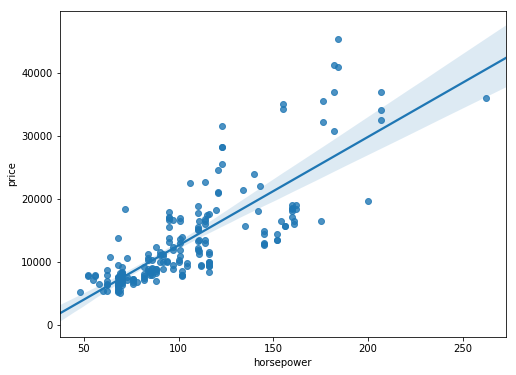

In [24]:
width = 8
height = 6
plt.figure(figsize=(width, height))
sns.regplot(df['horsepower'], df['price'], data = df)
plt.show()

We can see from this plot that price is negatively correlated to highway-mpg, since the regression slope is negative. One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data, and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data. Let's compare this plot to the regression plot of "peak-rpm".

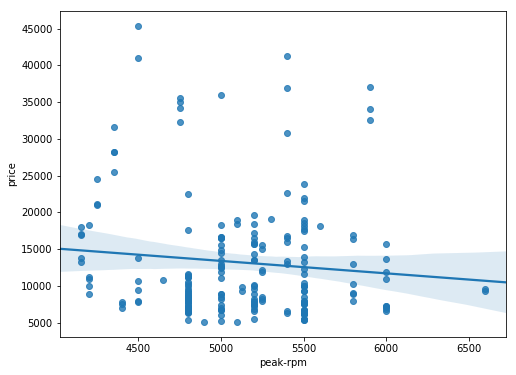

In [26]:
width = 8
height = 6
plt.figure(figsize=(width, height))
sns.regplot(df['peak-rpm'], df['price'], data = df)
plt.show()

Comparing the regression plot of "peak-rpm" and "horsepower" we see that the points for "highway-mpg" are much closer to the generated line and on the average decrease. The points for "peak-rpm" have more spread around the predicted line, and it is much harder to determine if the points are decreasing or increasing as the "highway-mpg" increases.

Question #3:
Given the regression plots above is "peak-rpm" or "highway-mpg" more strongly correlated with "price". Use the method ".corr()" to verify your answer.

In [27]:
df[["peak-rpm","highway-mpg","horsepower","price"]].corr()

,peak-rpm,highway-mpg,horsepower,price
peak-rpm,1.000000,-0.058598,0.107885,-0.101616
highway-mpg,-0.058598,1.000000,-0.804575,-0.704692
horsepower,0.107885,-0.804575,1.000000,0.809575
price,-0.101616,-0.704692,0.809575,1.000000


Residual Plot
A good way to visualize the variance of the data is to use a residual plot.

What is a residual?

The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

So what is a residual plot?

A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

What do we pay attention to when looking at a residual plot?

We look at the spread of the residuals:

- If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data. Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

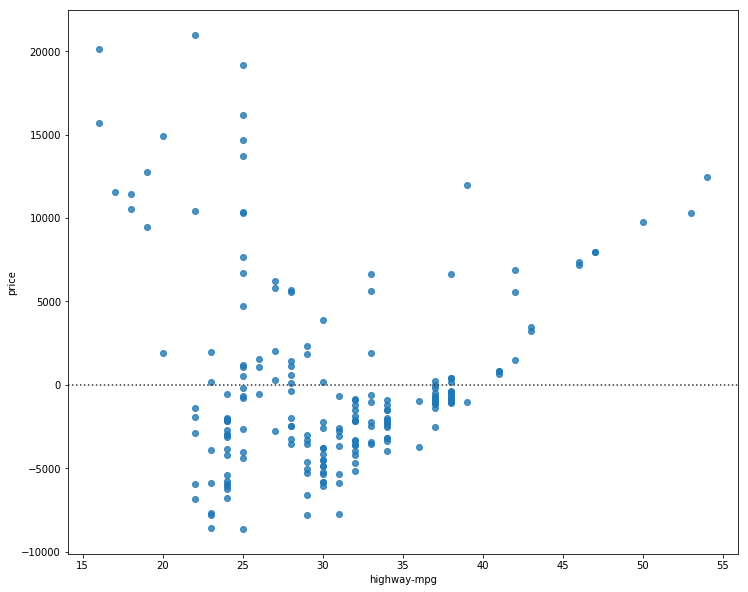

In [28]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

What is this plot telling us?

We can see from this residual plot that the residuals are not randomly spread around the x-axis, which leads us to believe that maybe a non-linear model is more appropriate for this data.

Multiple Linear Regression
How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.

One way to look at the fit of the model is by looking at the distribution plot: We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

First lets make a prediction

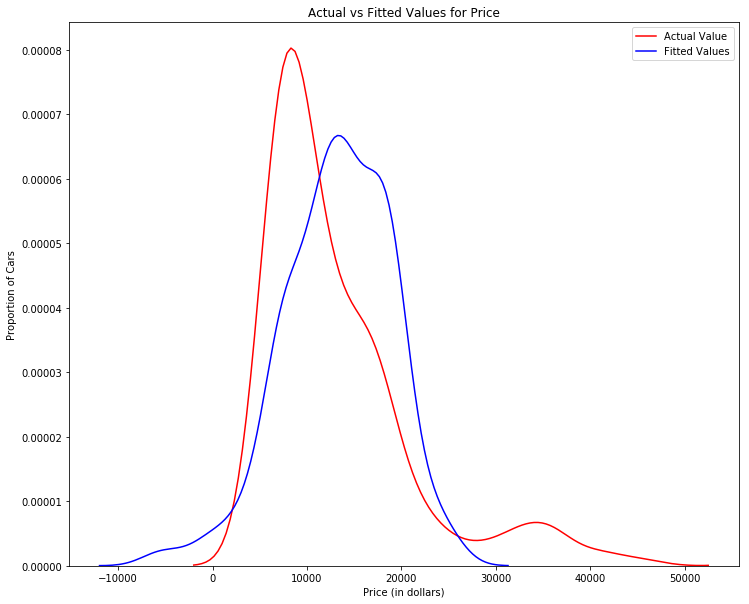

In [29]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.

Polynomial regression is a particular case of the general linear regression model or multiple linear regression models.

We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.

There are different orders of polynomial regression:

Quadratic - 2nd order
𝑌ℎ𝑎𝑡=𝑎+𝑏1𝑋2+𝑏2𝑋2
 
Cubic - 3rd order
𝑌ℎ𝑎𝑡=𝑎+𝑏1𝑋2+𝑏2𝑋2+𝑏3𝑋3
Higher order:
𝑌=𝑎+𝑏1𝑋2+𝑏2𝑋2+𝑏3𝑋3....
We saw earlier that a linear model did not provide the best fit while using highway-mpg as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.

We will use the following function to plot the data:

In [30]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [31]:
x = df['highway-mpg']
y = df['price']

Let's fit the polynomial using the function polyfit, then use the function poly1d to display the polynomial function.

In [32]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


Let's plot the function

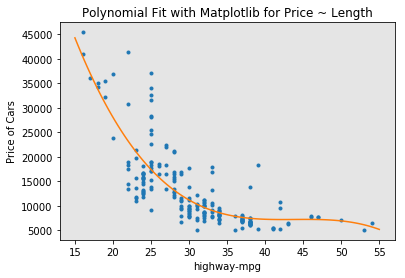

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [33]:
PlotPolly(p, x, y, 'highway-mpg')
np.polyfit(x, y, 3)

We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function "hits" more of the data points.

Question #4:
Create 11 order polynomial model with the variables x and y from above?

In [34]:
f = np.polyfit(x, y, 11)
p = np.poly1d(f)
print(p)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


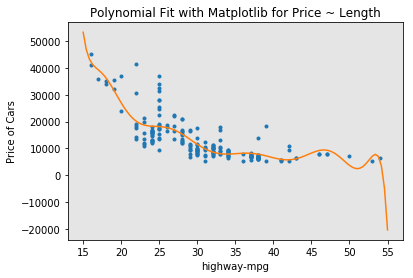

array([-1.24263280e-08,  4.72184468e-06, -8.02842754e-04,  8.05639565e-02,
       -5.29740489e+00,  2.39470103e+02, -7.58845012e+03,  1.68447089e+05,
       -2.56530896e+06,  2.55140360e+07, -1.49106807e+08,  3.87929664e+08])

In [35]:
PlotPolly(p, x, y, 'highway-mpg')
np.polyfit(x, y, 11)

The analytical expression for Multivariate Polynomial function gets complicated. For example, the expression for a second-order (degree=2)polynomial with two variables is given by:

𝑌ℎ𝑎𝑡=𝑎+𝑏1𝑋1+𝑏2𝑋2+𝑏3𝑋1𝑋2+𝑏4𝑋21+𝑏5𝑋22
 
We can perform a polynomial transform on multiple features. First, we import the module:

In [37]:
from sklearn.preprocessing import PolynomialFeatures

We create a PolynomialFeatures object of degree 2:

In [38]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [39]:
Z_pr=pr.fit_transform(Z)

The original data is of 201 samples and 4 features

In [40]:
Z.shape

(201, 4)

after the transformation, there 201 samples and 15 features

In [41]:
Z_pr.shape

(201, 15)

Pipeline


Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

We create the pipeline, by creating a list of tuples including the name of the model or estimator and its corresponding constructor.

In [43]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [44]:
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

We can normalize the data, perform a transform and fit the model simultaneously.

In [45]:
pipe.fit(Z,y)

/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [46]:
ypipe=pipe.predict(Z)
ypipe[0:4]

/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

Question #5:
Create a pipeline that Standardizes the data, then perform prediction using a linear regression model using the features Z and targets y

In [47]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

Part 4: Measures for In-Sample Evaluation
    

When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

R^2 / R-squared
Mean Squared Error (MSE)
R-squared

R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.

The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

Mean Squared Error (MSE)

The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).

Model 1: Simple Linear Regression

In [49]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y).round(2))

The R-square is:  0.76


We can say that ~ 49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".

Let's calculate the MSE

We can predict the output i.e., "yhat" using the predict method, where X is the input variable:

In [50]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [13728.4631336  13728.4631336  17399.38347881 10224.40280408]


lets import the function mean_squared_error from the module metrics

In [51]:
from sklearn.metrics import mean_squared_error

we compare the predicted results with the actual results

In [53]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse.round(2))

The mean square error of price and predicted value is:  15021126.03


Model 2: Multiple Linear Regression

Let's calculate the R^2

In [55]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']).round(2))

The R-square is:  0.81


We can say that ~ 80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

Let's calculate the MSE

we produce a prediction

In [56]:
Y_predict_multifit = lm.predict(Z)

we compare the predicted results with the actual results

In [57]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.870726489


Model 3: Polynomial Fit
Let's calculate the R^2

let’s import the function r2_score from the module metrics as we are using a different function

In [58]:
from sklearn.metrics import r2_score

We apply the function to get the value of r^2

In [59]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.7023769094721823


MSE

We can also calculate the MSE:

In [60]:
mean_squared_error(df['price'], p(x))

18703127.624789312

Part 5: Prediction and Decision Making
    
Prediction

In the previous section, we trained the model using the method fit. Now we will use the method predict to produce a prediction. Lets import pyplot for plotting; we will also be using some functions from numpy.

In [61]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

Create a new input

In [62]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

Fit the model

In [63]:
lm.fit(X, Y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Produce a prediction

In [64]:
yhat=lm.predict(new_input)
yhat[0:5]

array([-7796.47889059, -7629.6188749 , -7462.75885921, -7295.89884352,
       -7129.03882782])

we can plot the data

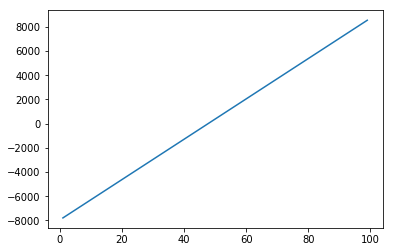

In [65]:
plt.plot(new_input, yhat)
plt.show()

Decision Making: Determining a Good Model Fit
    
    
Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?


What is a good R-squared value?
When comparing models, the model with the higher R-squared value is a better fit for the data.


What is a good MSE?
When comparing models, the model with the smallest MSE value is a better fit for the data.


Let's take a look at the values for the different models.
Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.

    
R-squared: 0.49659118843391759
MSE: 3.16 x10^7
Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.

    
R-squared: 0.80896354913783497
MSE: 1.2 x10^7
Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.


R-squared: 0.6741946663906514
MSE: 2.05 x 10^7
Simple Linear Regression model (SLR) vs Multiple Linear Regression model (MLR)
Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and or even act as noise. As a result, you should always check the MSE and R^2.


So to be able to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.


MSEThe MSE of SLR is 3.16x10^7 while MLR has an MSE of 1.2 x10^7. The MSE of MLR is much smaller.
R-squared: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).
This R-squared in combination with the MSE show that MLR seems like the better model fit in this case, compared to SLR.


Simple Linear Model (SLR) vs Polynomial Fit
MSE: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.
R-squared: The R-squared for the Polyfit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.
Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting Price with Highway-mpg as a predictor variable.

Multiple Linear Regression (MLR) vs Polynomial Fit
MSE: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.
R-squared: The R-squared for the MLR is also much larger than for the Polynomial Fit.
Conclusion:
Comparing these three models, we conclude that the MLR model is the best model to be able to predict price from our dataset. This result makes sense, since we have 27 variables in total, and we know that more than one of those variables are potential predictors of the final car price.